# Otimização por Múltiplos Enxames Aplicada ao Escalonamento Dinâmico de Projetos de Software


### QP1. Qual a influência do tamanho dos enxames no desempenho de um algortimo multiswarm?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dspsp_analysis import (algorithm_dataset, instance_dataset, comparison_dataset, 
                            max_event, metrics_dataset, mean_hypervolume)

%matplotlib inline

data = metrics_dataset(filepath="../hypervolume/metrics-by-swarm-size.csv")
instance_ids = list(data.instance.unique())
algorithm_ids = list(data.algorithm.unique())

instance_datasets = {}
for inst in instance_ids:
    ds = instance_dataset(data, inst, zero_values=True)
    instance_datasets[inst] = {alg: algorithm_dataset(ds, alg, zero_values=True) for alg in algorithm_ids}

comparison_datasets = {}
for inst in instance_ids:
    comparison_datasets[inst] = {alg: comparison_dataset(instance_datasets[inst][alg]) for alg in algorithm_ids}

for inst in instance_ids:
    min_event = min([max_event(ds) for ds in comparison_datasets[inst].values()])
    for k in comparison_datasets[inst].keys():
        comparison_datasets[inst][k] = comparison_datasets[inst][k][:min_event+1]


In [8]:
mean_hypervolume(data)

mean      std
instance            algorithm                      
ST30_DT10_E15_SK6-7 MS2MO-30s60p  0.087231  0.29709
                    MS2MO-5s200p  0.082964  0.28837

#### Gráficos comparativos

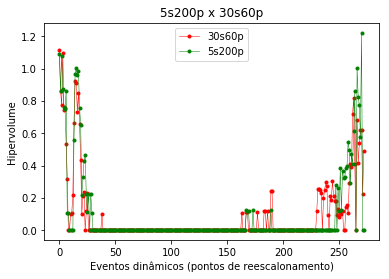

In [10]:
plt.title("5s200p x 30s60p")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(comparison_datasets["ST30_DT10_E15_SK6-7"]["MS2MO-30s60p"].event, comparison_datasets["ST30_DT10_E15_SK6-7"]["MS2MO-30s60p"].hypervolume, "-ro", markersize=3, lw=.5, label="30s60p")
plt.plot(comparison_datasets["ST30_DT10_E15_SK6-7"]["MS2MO-5s200p"].event, comparison_datasets["ST30_DT10_E15_SK6-7"]["MS2MO-5s200p"].hypervolume, "-go", markersize=3, lw=.5, label="5s200p")
plt.legend()
plt.show()

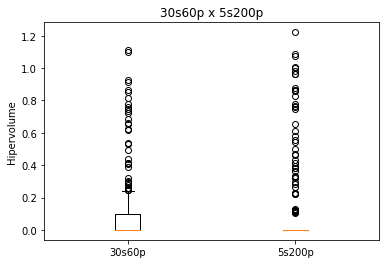

In [27]:
plt.title("30s60p x 5s200p")
# plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
# plt.boxplot(comparison_datasets["ST30_DT10_E15_SK6-7"]["MS2MO-30s60p"].hypervolume, 0)
# plt.figure()
plt.boxplot([comparison_datasets["ST30_DT10_E15_SK6-7"]["MS2MO-30s60p"].hypervolume, comparison_datasets["ST30_DT10_E15_SK6-7"]["MS2MO-5s200p"].hypervolume], labels=["30s60p", "5s200p"])
# plt.legend()
plt.show()